## Breast Cancer Classifier
In this project, we will be using several Python libraries to make a K-Nearest Neighbor classifier that is trained to predict whether a patient has breast cancer.<b>
Project description, courtesy of Codecademy©

## Explore the data
Let’s begin by importing the breast cancer data from sklearn. We want to import the function load_breast_cancer from sklearn.datasets.

Once we’ve imported the dataset, let’s load the data into a variable called breast_cancer_data. Do this by setting breast_cancer_data equal to the function load_breast_cancer().

In [1]:
import seaborn as sns
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

Before jumping into creating our classifier, let’s take a look at the data. Begin by printing breast_cancer_data.data[0]. That’s the first datapoint in our set. But what do all of those numbers represent? Let’s also print breast_cancer_data.feature_names.

In [7]:
print(breast_cancer_data.data[0])
print(breast_cancer_data.feature_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


We now have a sense of what the data looks like, but what are we trying to classify? Let’s print both breast_cancer_data.target and breast_cancer_data.target_names.

Was the very first data point tagged as malignant or benign?

In [8]:
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

We have our data, but now it needs to be split into training and validation sets. Luckily, sklearn has a function that does that for us. 

In [30]:
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 120)
print(len(training_data), len(training_labels))

455 455


Now that we’ve created training and validation sets, we can create a KNeighborsClassifier and test its accuracy. 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
for k in range (1, 101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    print("K =", k, ":", classifier.score(validation_data, validation_labels))

K = 1 : 0.9210526315789473
K = 2 : 0.9210526315789473
K = 3 : 0.9473684210526315
K = 4 : 0.956140350877193
K = 5 : 0.9473684210526315
K = 6 : 0.9473684210526315
K = 7 : 0.9473684210526315
K = 8 : 0.9473684210526315
K = 9 : 0.9473684210526315
K = 10 : 0.9473684210526315
K = 11 : 0.9473684210526315
K = 12 : 0.9473684210526315
K = 13 : 0.9385964912280702
K = 14 : 0.9385964912280702
K = 15 : 0.9385964912280702
K = 16 : 0.9298245614035088
K = 17 : 0.9385964912280702
K = 18 : 0.9298245614035088
K = 19 : 0.9385964912280702
K = 20 : 0.9385964912280702
K = 21 : 0.9385964912280702
K = 22 : 0.9385964912280702
K = 23 : 0.9385964912280702
K = 24 : 0.9385964912280702
K = 25 : 0.9298245614035088
K = 26 : 0.9298245614035088
K = 27 : 0.9298245614035088
K = 28 : 0.9298245614035088
K = 29 : 0.9298245614035088
K = 30 : 0.9298245614035088
K = 31 : 0.9298245614035088
K = 32 : 0.9298245614035088
K = 33 : 0.9298245614035088
K = 34 : 0.9298245614035088
K = 35 : 0.9298245614035088
K = 36 : 0.9298245614035088
K 

We now have the validation accuracy for 100 different ks. Rather than just printing it out, let’s make a graph using matplotlib

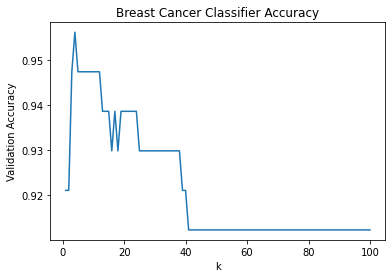

In [32]:
import matplotlib.pyplot as plt
k_list = []
accuracies = []

from sklearn.neighbors import KNeighborsClassifier
for k in range (1, 101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    k_list.append(k)
    accuracies.append(classifier.score(validation_data, validation_labels))
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()